1️⃣ SHAP with Sampling – Using a subset of data for faster computation.

2️⃣ SHAP Approximations – Using shap.TreeExplainer for tree models.

3️⃣ SHAP with KMeans Sampling – Clustering data points to reduce size.

4️⃣ Parallel SHAP Computation – Using GPU acceleration.

5️⃣ Permutation Feature Importance (Alternative to SHAP for Large Data).

In [19]:
import numpy as np

import pandas as pd

import shap

import xgboost as xgb

from shap import kmeans

from sklearn.model_selection import train_test_split

from sklearn.inspection import permutation_importance 

In [20]:
# Load dataset (Using a large synthetic dataset)

X, y = shap.datasets.adult()  # SHAP’s built-in dataset

In [21]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [22]:
# Train XGBoost Model

model = xgb.XGBClassifier(
    n_estimators =500, 
    learning_rate = 0.05, 
    max_depth = 5, 
    random_state = 42
    )

In [23]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
# SHAP Explainer (Using TreeExplainer for efficiency)

explainer = shap.TreeExplainer(model)

1️⃣ SHAP With Sampling (Faster Computation)

In [25]:
sampled_data = X_train.sample(
    n = 10000, 
    random_state = 42
    )

# Using a sample of 10,000 rows


shap_values_sampled = explainer(sampled_data)

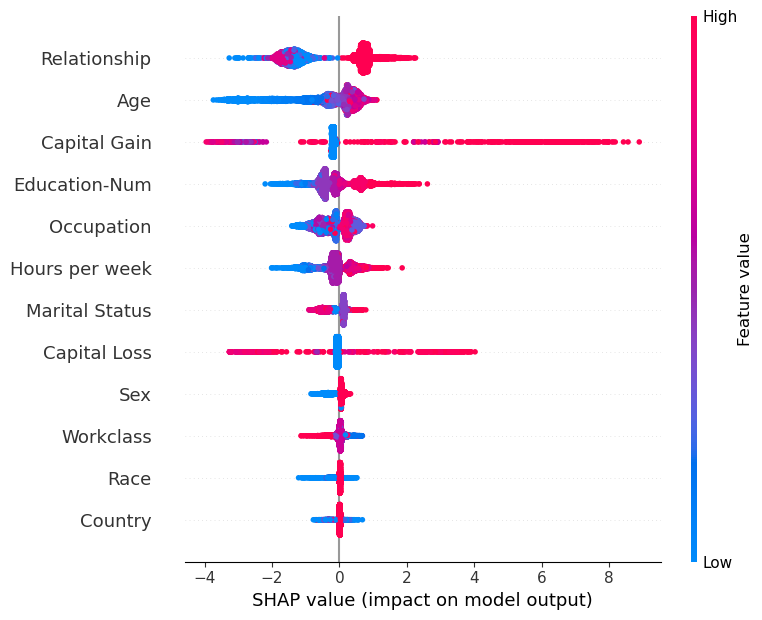

In [26]:
# Summary plot for sampled data

shap.summary_plot(shap_values_sampled,sampled_data)

2️⃣ SHAP Approximation for Trees (Faster Computation)


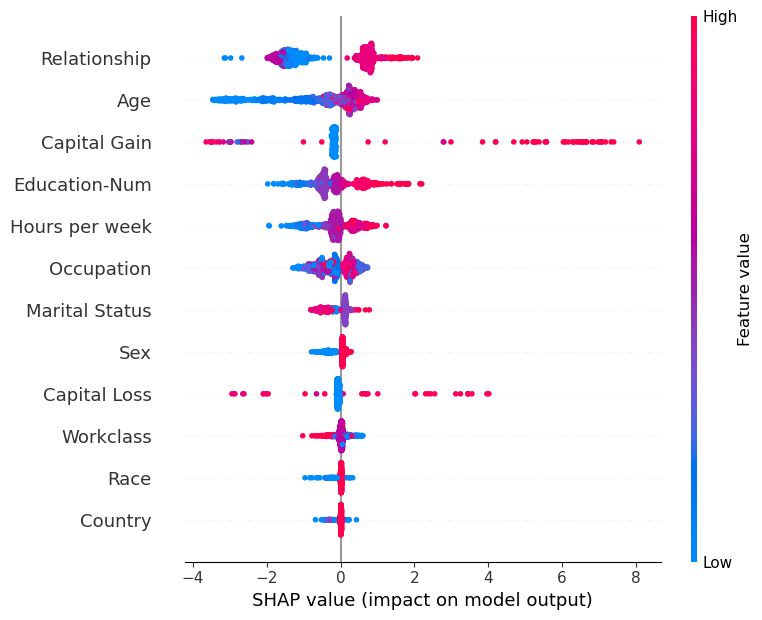

In [27]:
shap_values_approx = explainer.shap_values(X_train[:1000]) # Only computing for 1000 points

shap.summary_plot(shap_values_approx,X_train[:1000])

3️⃣ SHAP Using KMeans Clustering (Selecting Representative Data Points)

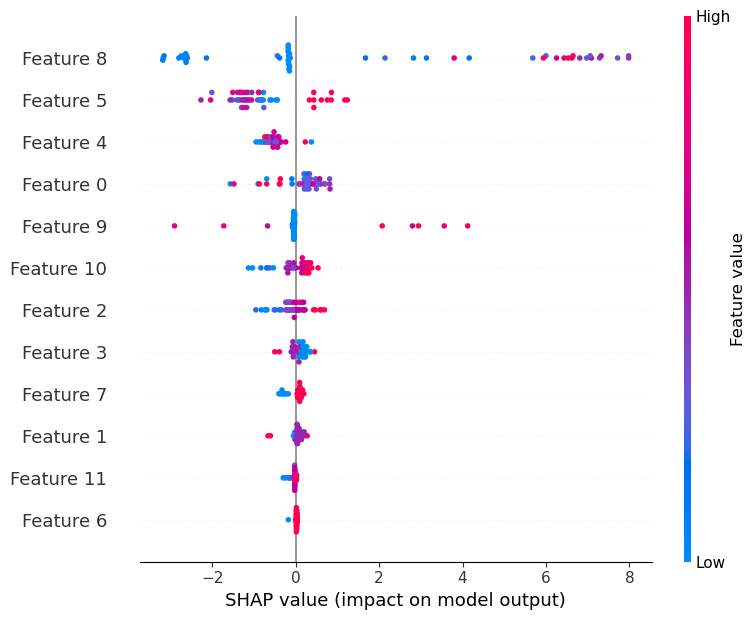

In [29]:
X_kmeans = kmeans(X_train,50)  # Reducing dataset to 50 representative points

X_kmeans_array = np.array(X_kmeans.data)


shap_values_kmeans = explainer(X_kmeans_array)

shap.summary_plot(shap_values_kmeans,X_kmeans_array)

4️⃣ SHAP With Parallel GPU Computation (XGBoost/LGBM Only)

 98%|===================| 4922/5000 [00:38<00:00]        

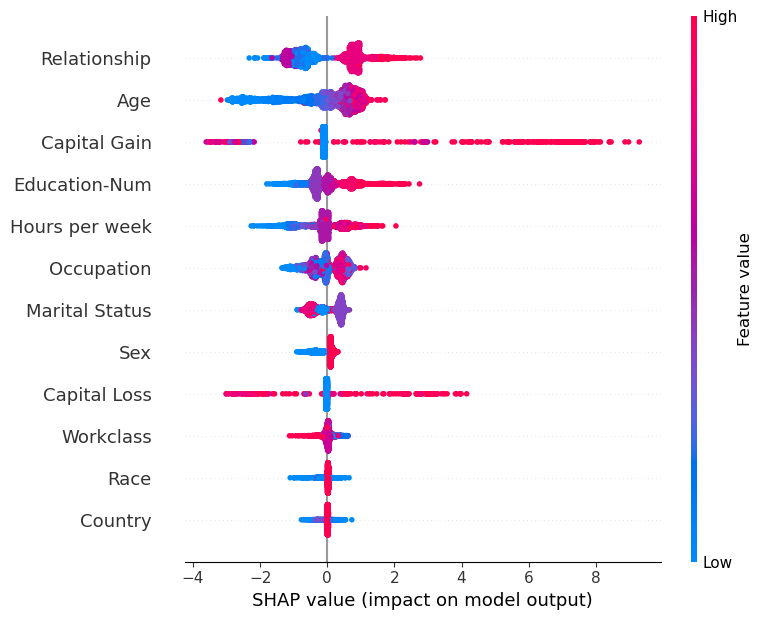

In [31]:
explainer_gpu = shap.TreeExplainer(model, model_output='raw' , data=X_train)   # GPU acceleration

shap_values_gpu = explainer_gpu(X_train.sample(5000, random_state=42))  # Faster processing

shap.summary_plot(shap_values_gpu, X_train.sample(5000,random_state=42))

5️⃣ Alternative: Permutation Feature Importance (Non-SHAP)


In [32]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({'Feature' : X_train.columns, 'Importance': perm_importance.importances_mean})

perm_df = perm_df.sort_values(by='Importance', ascending=False)

print("Permutation Feature Importance : \n", perm_df)

Permutation Feature Importance : 
            Feature  Importance
8     Capital Gain    0.052480
5     Relationship    0.035452
2    Education-Num    0.032581
0              Age    0.019423
4       Occupation    0.018701
9     Capital Loss    0.015339
10  Hours per week    0.008552
3   Marital Status    0.007385
1        Workclass    0.003163
11         Country    0.001336
7              Sex    0.001198
6             Race    0.000322
